<a href="https://colab.research.google.com/github/Shkum/IT_STEP/blob/ML/%22DZ_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/possum.csv")

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
df.columns = df.columns.str.lower()

In [5]:
print(df.info)

<bound method DataFrame.info of      case  site    pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye

# Завдання 1
Вмведіть основні числові характеристики для числових ознак

In [6]:
print(df.describe())

             case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.833333   92.602885   56.883654   87.088462   
std     30.166206    2.349086    1.909244    3.573349    3.113426    4.310549   
min      1.000000    1.000000    1.000000   82.500000   50.000000   75.000000   
25%     26.750000    1.000000    2.250000   90.675000   54.975000   84.000000   
50%     52.500000    3.000000    3.000000   92.800000   56.350000   88.000000   
75%     78.250000    6.000000    5.000000   94.725000   58.100000   90.000000   
max    104.000000    7.000000    9.000000  103.100000   68.600000   96.500000   

            taill    footlgth    earconch         eye       chest       belly  
count  104.000000  103.000000  104.000000  104.000000  104.000000  104.000000  
mean    37.009615   68.459223   48.130769   15.046154   27.000000   32.586538  
std      1.959518    4.395306 

# Завдання 2
Проаналізуйте стовпчик `case`, чи є він інформативним?

In [7]:
print(df['case'].describe())
print()
print(df['case'].nunique())
print()
print(df['case'].count())
print()
print(df['case'].head())
print()
print(df['case'].tail())
print()
print('The column "case" has only numbers of each row and can be deleted')
# the column "case" has only numbers of each row and can be deleted

count    104.000000
mean      52.500000
std       30.166206
min        1.000000
25%       26.750000
50%       52.500000
75%       78.250000
max      104.000000
Name: case, dtype: float64

104

104

0    1
1    2
2    3
3    4
4    5
Name: case, dtype: int64

99     100
100    101
101    102
102    103
103    104
Name: case, dtype: int64

The column "case" has only numbers of each row and can be deleted


# Завдання 3
Очистіть дані від викидів. Виведіть очищений датафрейм

In [8]:
print('\n', df.describe(), '\n')

def get_mask_extra(data, column):
    q1 = data[column].quantile(q=0.25)
    q3 = data[column].quantile(q=0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    column = df[column]
    mask = (column >= lower) & (column <= upper)
    return data[mask]


def remove_extra(data):
    for column in data.columns:
        if data[column].dtype != 'object':
            # data[column].plot(kind='box', vert=False, figsize=(14, 6))
            # plt.show()
            data = get_mask_extra(data, column)
    return data

df = remove_extra(df)

print('\nAfter removing of extra values:\n'.upper(), df.describe(), '\n')


              case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.833333   92.602885   56.883654   87.088462   
std     30.166206    2.349086    1.909244    3.573349    3.113426    4.310549   
min      1.000000    1.000000    1.000000   82.500000   50.000000   75.000000   
25%     26.750000    1.000000    2.250000   90.675000   54.975000   84.000000   
50%     52.500000    3.000000    3.000000   92.800000   56.350000   88.000000   
75%     78.250000    6.000000    5.000000   94.725000   58.100000   90.000000   
max    104.000000    7.000000    9.000000  103.100000   68.600000   96.500000   

            taill    footlgth    earconch         eye       chest       belly  
count  104.000000  103.000000  104.000000  104.000000  104.000000  104.000000  
mean    37.009615   68.459223   48.130769   15.046154   27.000000   32.586538  
std      1.959518    4.39530

<ipython-input-8-2b6817688bc2>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return data[mask]
<ipython-input-8-2b6817688bc2>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return data[mask]
<ipython-input-8-2b6817688bc2>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return data[mask]
<ipython-input-8-2b6817688bc2>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return data[mask]
<ipython-input-8-2b6817688bc2>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return data[mask]
<ipython-input-8-2b6817688bc2>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return data[mask]
<ipython-input-8-2b6817688bc2>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return data[mask]
<ipython-input-8-2b6817688bc2>:11: UserWarning: Boolean Series key will be reindexe

# Завдання 4
Намалюйте матрицб кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму.

<ipython-input-9-038bc8655bff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


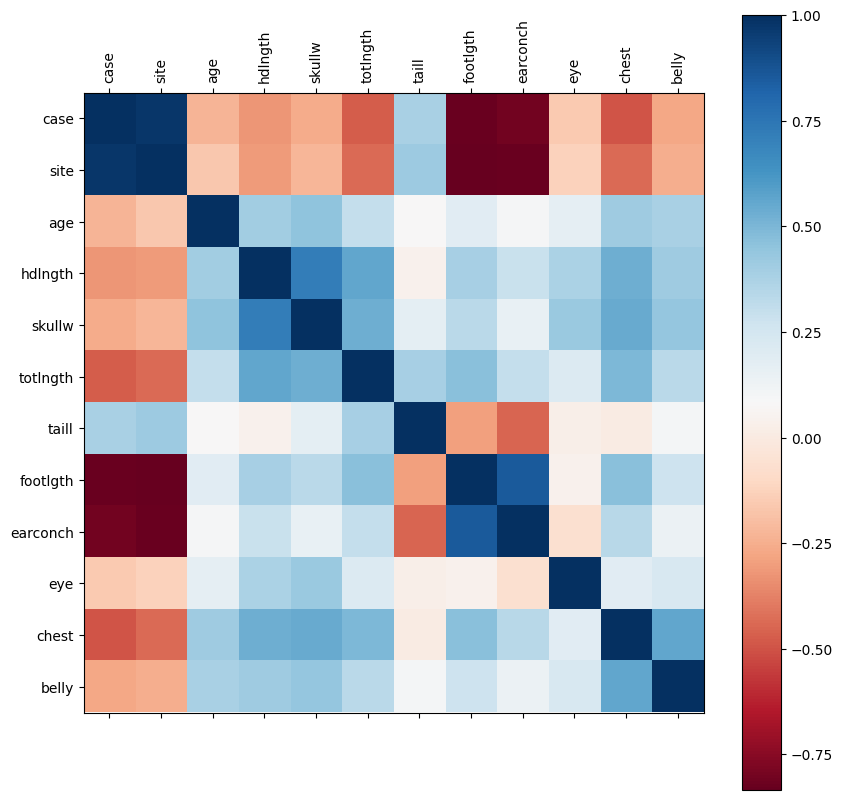

In [9]:
corr = df.corr(method='pearson')
fig = plt.figure(figsize=(10,10))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

<ipython-input-10-31920cbc4d19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


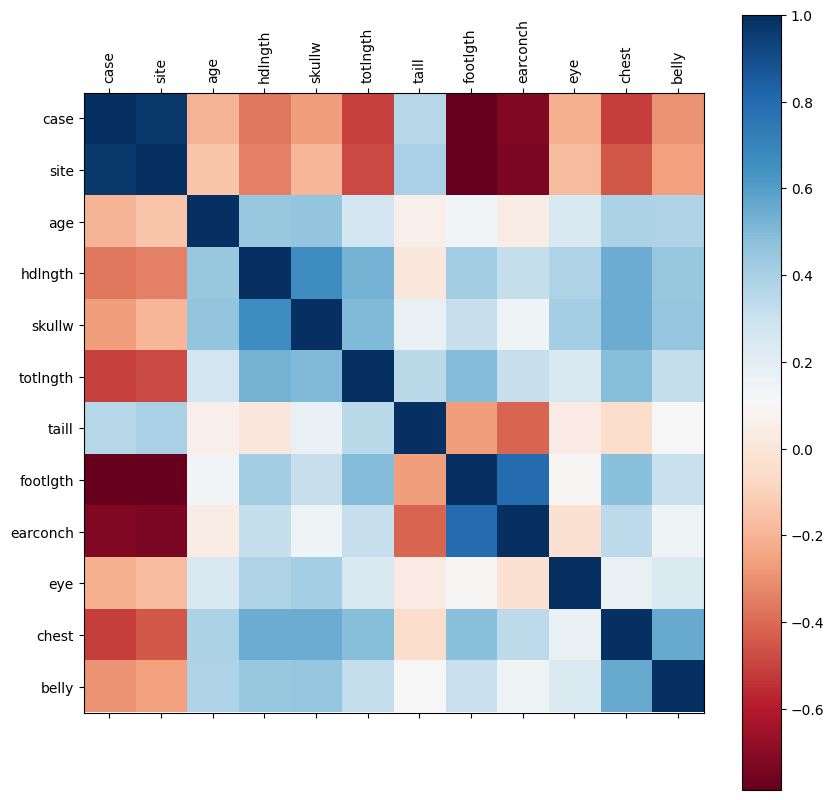

In [10]:
corr = df.corr(method='spearman')

fig = plt.figure(figsize=(10,10))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

<Axes: xlabel='case', ylabel='site'>

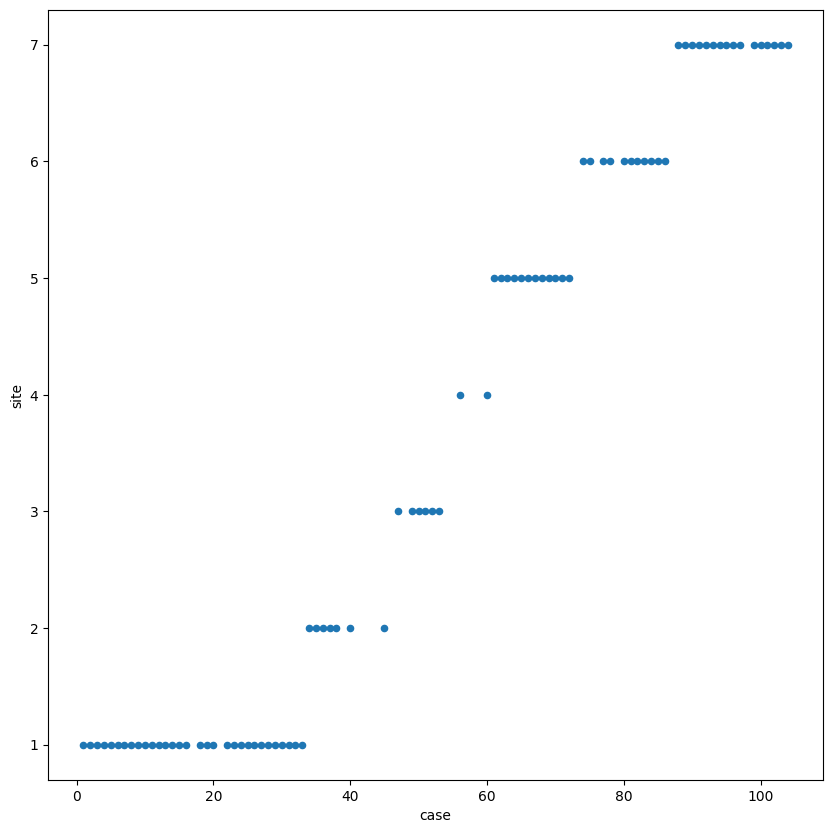

In [11]:
df.plot(kind='scatter', x='case', y='site', figsize=(10,10))

<Axes: xlabel='case', ylabel='footlgth'>

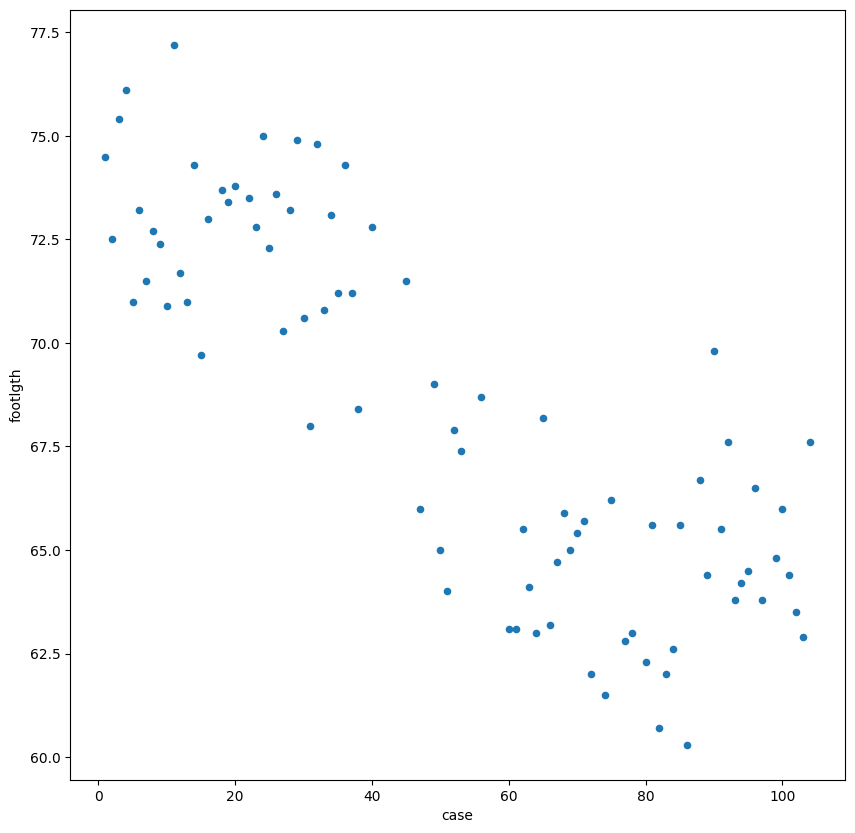

In [12]:
df.plot(kind='scatter', x='case', y='footlgth', figsize=(10,10))

<Axes: xlabel='footlgth', ylabel='site'>

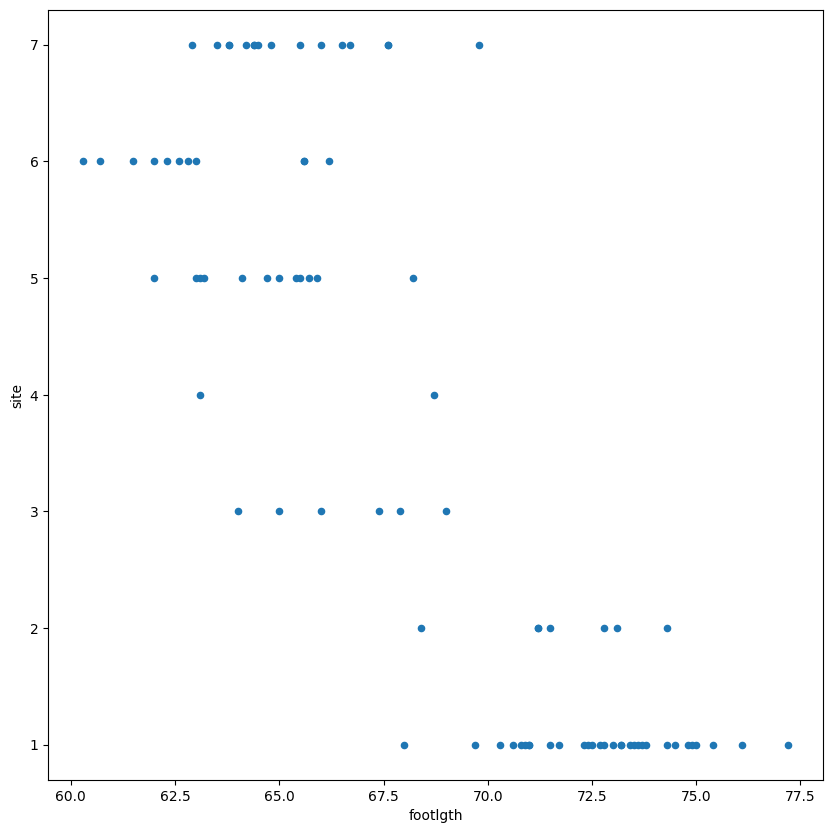

In [13]:
df.plot(kind='scatter', x='footlgth', y='site', figsize=(10,10))

# Завдання 5
Для 4-ох числових ознак на вибір намалюйте ящики з вусами згрупованими по статі. Подумайте чи є вплив статі на розміри опосума

In [14]:
print(df.columns)

Index(['case', 'site', 'pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


In [19]:
df.head()

,case,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


array([[<Axes: title={'center': 'earconch'}, xlabel='[sex]'>,
        <Axes: title={'center': 'footlgth'}, xlabel='[sex]'>],
       [<Axes: title={'center': 'hdlngth'}, xlabel='[sex]'>,
        <Axes: title={'center': 'totlngth'}, xlabel='[sex]'>]],
      dtype=object)

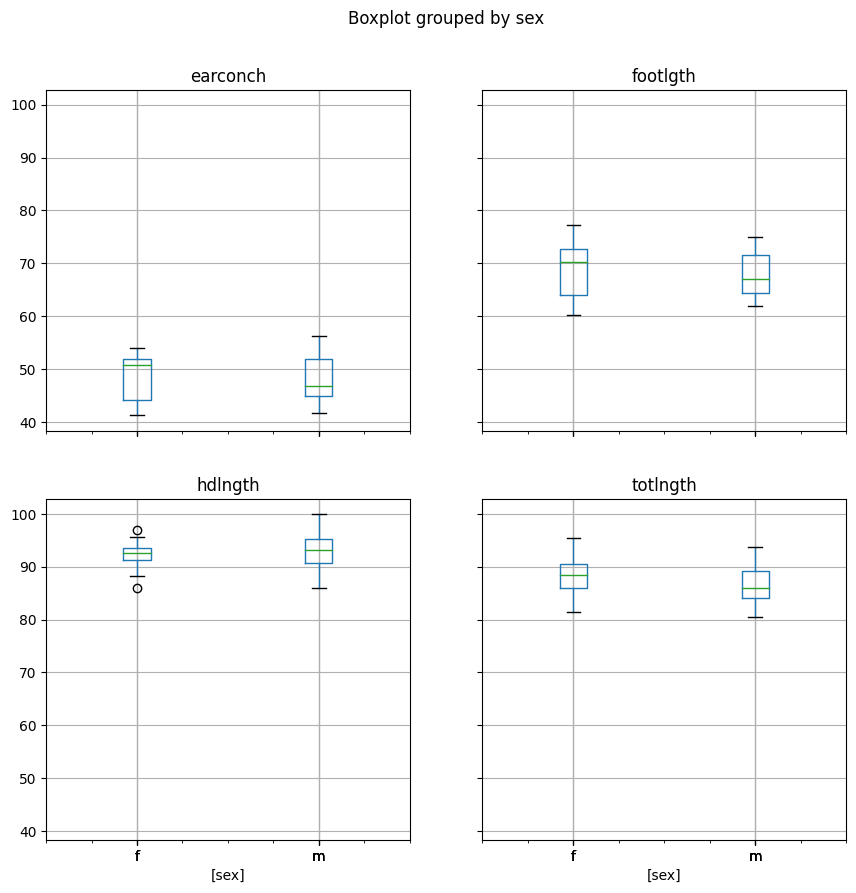

In [23]:
df[['hdlngth', 'totlngth', 'footlgth', 'earconch', 'sex']].boxplot(by='sex', figsize=(10, 10))
